# **Medical diabetes Dataset**
    ## About Dataset
    The data came from a medical examination data set at a medical institution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import random
from dython.nominal import associations

In [2]:
md = pd.read_csv('healthcare-dataset-diabetes-data.csv')
md

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,diabete
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Checking data and doing some exploratory analysis**

In [3]:
md.shape

(5110, 12)

In [4]:
md.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,diabete
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#checking the data types
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  diabete            5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# checking is null
md.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
diabete                0
dtype: int64

In [7]:
# lets replace missing values on BMI by using nearest values close to age and other features
md.bmi.fillna(0, inplace = True)


In [8]:
md.bmi = md.bmi.replace(0,md.bmi.median())
md.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,diabete
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


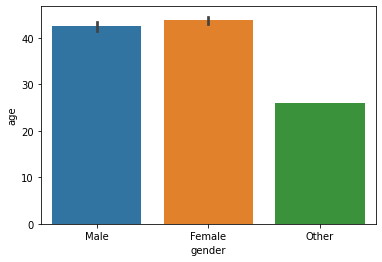

In [9]:
# distribution of gender by age
sns.barplot(data= md.loc[:, ['age', 'gender']], y = md.loc[:, ['age', 'gender']].age, x = md.loc[:, ['age', 'gender']].gender);

In [10]:
md['check'] = [ 'has diabetes' if i == 1 else 'no diabetes' for i in md.diabete]  # adding a column label to assign has diabetes
gender_d = md.loc[:,['gender','check']].value_counts().to_frame().rename({0:'sum_cases'},axis = 1)
gender_d 

,,sum_cases
gender,check,
Female,no diabetes,2853
Male,no diabetes,2007
Female,has diabetes,141
Male,has diabetes,108
Other,no diabetes,1


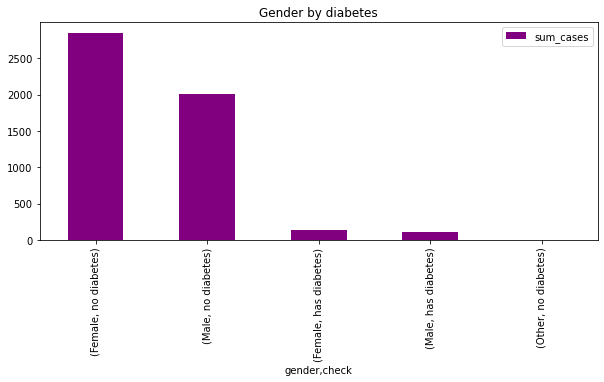

In [11]:
gender_d.plot(kind = 'bar', figsize =(10,4), color = 'purple', title = 'Gender by diabetes');

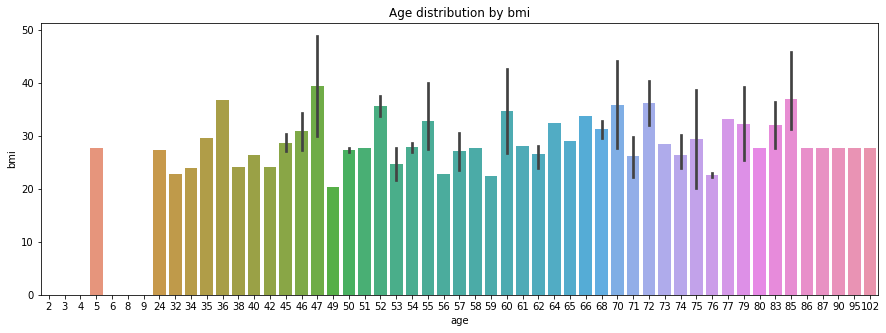

In [12]:
# Age with highest diabetics
fig, ax = plt.subplots(figsize = (15,5) )
sns.barplot(data = md, x =  md.age.value_counts(), y= md.bmi )
ax.set(title = 'Age distribution by bmi');

In [13]:
print(f'The correlation btw age and bmi is {round(md.age.corr(md.bmi),2)}')
print()
print(f'The correlation btw age and glucose level is {round (md.age.corr(md.avg_glucose_level),2)}')
print()
print(f'The correlation btw heart disease and glucose level is {round(md.heart_disease.corr(md.diabete),2)}')

The correlation btw age and bmi is 0.32

The correlation btw age and glucose level is 0.24

The correlation btw heart disease and glucose level is 0.13


<AxesSubplot:>

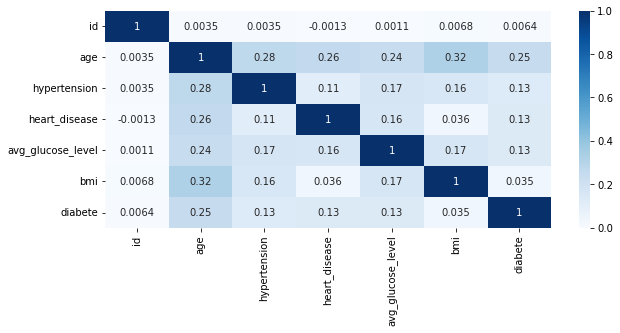

In [14]:
fig.ax = plt.subplots(figsize = (10, 4))
sns.heatmap(md.corr(),annot = True, cmap ='Blues')

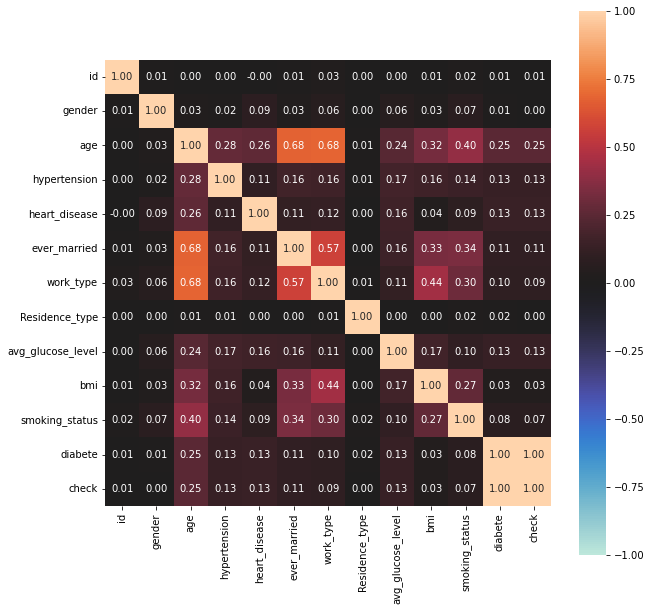

{'corr':                          id    gender       age  hypertension  heart_disease  \
 id                 1.000000  0.013127  0.003538      0.003550      -0.001296   
 gender             0.013127  1.000000  0.029727      0.021715       0.085749   
 age                0.003538  0.029727  1.000000      0.276398       0.263796   
 hypertension       0.003550  0.021715  0.276398      1.000000       0.108306   
 heart_disease     -0.001296  0.085749  0.263796      0.108306       1.000000   
 ever_married       0.013690  0.029870  0.679125      0.164243       0.114644   
 work_type          0.027792  0.058593  0.682044      0.162659       0.117627   
 Residence_type     0.001403  0.000000  0.014180      0.007913       0.003092   
 avg_glucose_level  0.001092  0.055912  0.238171      0.174474       0.161857   
 bmi                0.006842  0.029314  0.323416      0.157314       0.035911   
 smoking_status     0.019797  0.070888  0.399650      0.142575       0.093483   
 diabete            

In [15]:
associations(md, figsize = (10,10))

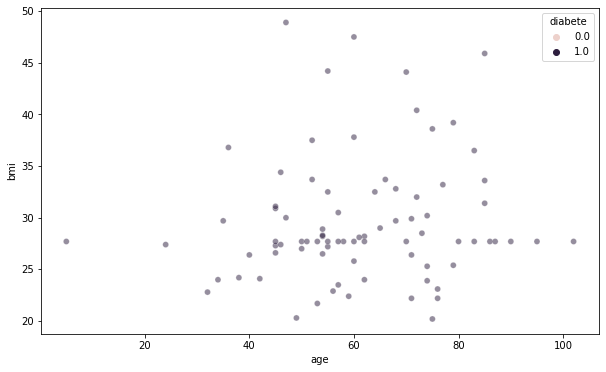

In [16]:
# Averge bmi by age
fig, ax = plt.subplots(figsize = (10,6) )
sns.scatterplot(data = md, x = md.age.value_counts(), y= md.bmi , hue = 'diabete', alpha = 0.5);

# **Lets do preprocessing of data to predict likelyhood of having diabetes**
## will utilize scikit learn

In [17]:
md.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,diabete,check
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,has diabetes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,never smoked,1,has diabetes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,has diabetes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,has diabetes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,has diabetes


In [18]:
X = md.drop(['id','check','heart_disease'], axis = 1)
y = md['heart_disease']

X.shape , y.shape, type(X), type(y)

((5110, 10), (5110,), pandas.core.frame.DataFrame, pandas.core.series.Series)

## **Feature Engineering**

In [19]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# now defime our categorical features
categorical_features  = ['work_type','Residence_type','smoking_status','ever_married','gender']
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                 remainder= 'passthrough')   # will take in a turple
                                 
                                 
transformed_X = transformer.fit_transform(X)
transformed_X    # this is X that has undergone cleaning

array([[  0.  ,   0.  ,   1.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,   0.  ,   0.  , ..., 202.21,  27.7 ,   1.  ],
       [  0.  ,   0.  ,   1.  , ..., 105.92,  32.5 ,   1.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  82.99,  30.6 ,   0.  ],
       [  0.  ,   0.  ,   1.  , ..., 166.29,  25.6 ,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [20]:
pd.DataFrame(transformed_X).shape

(5110, 21)

In [21]:
 from sklearn.ensemble import RandomForestClassifier

# create seed
random.seed(0)

# train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.20 )

# instantiate model
clf  = RandomForestClassifier(n_estimators = 100)
clf .fit(X_train,y_train)

RandomForestClassifier()

In [22]:
type(X_train) , type(y_train), X_train.shape, y_train.shape

(numpy.ndarray, pandas.core.series.Series, (4088, 21), (4088,))

In [23]:
y_preds = clf.predict(X_test)

In [24]:
y_preds .shape

(1022,)

In [25]:
print(f'Training Score:{clf.score(X_train, y_train)}') # inbuilt accuracy score
print(f'Test Score: {clf.score(X_test, y_test)}')     # inbuilt accuracy score

from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

print(f'Accuracy_score: {accuracy_score(y_test, y_preds)*100:0.2f}%')# for classifications only

Training Score:1.0
Test Score: 0.949119373776908
Accuracy_score: 94.91%


# **Tuning Hyper-Parameters with RandomSearchCV**

In [26]:
# Run RandomizedSearchCV to tune the hyper-parameter
from sklearn.model_selection import RandomizedSearchCV

rcv =RandomForestClassifier()
k_fold_cv = 5 # Stratified 5-fold cross validation
params = {
 "n_estimators" : [10,50,100],
 "max_features" : ["auto", "log2", "sqrt"],
 "bootstrap" : [True, False]
 }

random = RandomizedSearchCV (rcv, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring= "neg_mean_absolute_error",verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)


random.fit(X_train, y_train)

print("Best hyper parameter:", random.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyper parameter: {'n_estimators': 10, 'max_features': 'log2', 'bootstrap': True}


In [27]:
rcv.fit(X_train, y_train)
pred_rcv = rcv.predict(X_test)
accuracy_score(y_test,pred_rcv)

0.9481409001956947

In [28]:
pd.DataFrame(pred_rcv, columns =['prediction']).value_counts()

prediction
0             1018
1                4
dtype: int64

# **Fitting the predicted into the original dateframe**

In [29]:
y_predX = clf.predict(transformed_X)
prediction = pd.DataFrame(y_predX, columns = ['Prediction'])
pd.concat([md,prediction], ignore_index= False, axis  = 1).set_index('id').head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,diabete,check,Prediction
id,,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,has diabetes,0
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,never smoked,1,has diabetes,0
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,has diabetes,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,has diabetes,0
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,has diabetes,0


# Data avalailabe is not sufficient to make meaningful predictions, although accuracy is 93%

In [30]:
pd.DataFrame(pred_rcv).value_counts().to_frame()\
.rename({0 :'heart disease target'},axis = 1).rename\
({0 : 'no heart disease', 1: 'has heart disease'}, axis = 0).reset_index().rename({0 : 'status'},axis = 1)

,status,heart disease target
0,no heart disease,1018
1,has heart disease,4


In [31]:
md.heart_disease.value_counts().to_frame()\
.rename({0 :'count'},axis = 1).rename({0 : 'no heart disease', 1: 'has heart disease'}, \
axis = 0).rename({'heart_disease' :'heart disease predicted'},axis = 1).reset_index().rename({'index' : 'status'},axis = 1)

,status,heart disease predicted
0,no heart disease,4834
1,has heart disease,276


In [32]:
combine_check = pd.merge(pd.DataFrame(pred_rcv).value_counts().to_frame()\
.rename({0 :'heart disease target'},axis = 1).rename\
({0 : 'no heart disease', 1: 'has heart disease'}, axis = 0).reset_index().rename({0 : 'status'},axis = 1)\
        ,md.heart_disease.value_counts().to_frame()\
.rename({0 :'count'},axis = 1).rename({0 : 'no heart disease', 1: 'has heart disease'}, \
axis = 0).rename({'heart_disease' :'heart disease predicted'},axis = 1).reset_index().rename({'index' : 'status'},axis = 1),\
        left_on = 'status', right_on = 'status').set_index('status').T

combine_check

status,no heart disease,has heart disease
heart disease target,1018,4
heart disease predicted,4834,276


<AxesSubplot:>

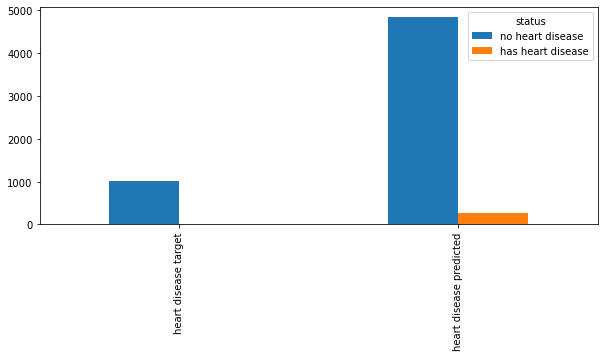

In [33]:
fi,ax=plt.subplots(figsize = (10,4))
combine_check.plot(kind = 'bar', ax= ax)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score

In [35]:
print(f'Training Score:{clf.score(X_train, y_train)}') # inbuilt accuracy score
print(f'Test Score: {clf.score(X_test, y_test)}')     # inbuilt accuracy score
print(f"Classifier Cross Validation_Score: {cross_val_score(clf,transformed_X,y,cv= 5)}") # cross validation
print(f'Accuracy_score_metric : {accuracy_score(y_test, y_preds)}')# for classifications only

Training Score:1.0
Test Score: 0.949119373776908
Classifier Cross Validation_Score: [0.93737769 0.94520548 0.94422701 0.94422701 0.94324853]
Accuracy_score_metric : 0.949119373776908


In [36]:
cr = classification_report(y_test, y_preds)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       973
           1       0.00      0.00      0.00        49

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



[[970   3]
 [ 49   0]]


<AxesSubplot:>

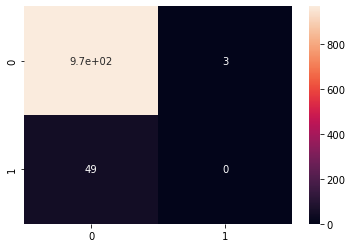

In [37]:
cm = confusion_matrix(y_test, y_preds)
print(cm)
sns.heatmap(cm,annot = True)